# Figures 6 and 7: Violin Plots

## 1. Notebook Setup

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None

## 2. Import Data

In [2]:
all_planets = pd.read_csv('../data/planets.csv')
mass_mask = all_planets['env mass flag']==0
planets = all_planets[mass_mask]
planets.index = planets['planet name']

## 3. Organize Data

In [3]:
planetnames = [x for x in list(planets['planet name']) if str(x) != 'nan']
for name in set(planetnames):
    planets.loc[name,'PEprobtot'] = planets.loc[name,'PEprob'].min()
    planets.loc[name,'CPMLprobtot'] = planets.loc[name,'CPMLprob'].min()
    planets.loc[name,'PRVprobtot'] = planets.loc[name,'PRVprob'].min()
planets=planets[planets['PEprobtot']>=0]

## 4. Helper Functions

In [4]:
makebins = lambda num,bounds: [(planets['star mass'] <= bounds[i+1]) & (planets['star mass'] > bounds[i]) for i in range(num)]
makeboxes = lambda num,probPE,probCPML,probPRV: [(probPE[i], probCPML[i], probPRV[i]) for i in range(num)]

In [5]:
# Fill probability lists
def prob_lists(bins):
    probPE,probCPML,probPRV = [],[],[]
    for b in range(num):
        probPE.append(planets['PEprobtot'][bins[b]])
        probCPML.append(planets['CPMLprobtot'][bins[b]])
        probPRV.append(planets['PRVprobtot'][bins[b]])
    return probPE,probCPML,probPRV

## 5. Plot Figure 6

In [6]:
num,bounds = 1,(0, 1.3)
bins=makebins(num, bounds)
probPE,probCPML,probPRV = prob_lists(bins)
colors = ['royalblue', 'brown', 'lightsalmon']

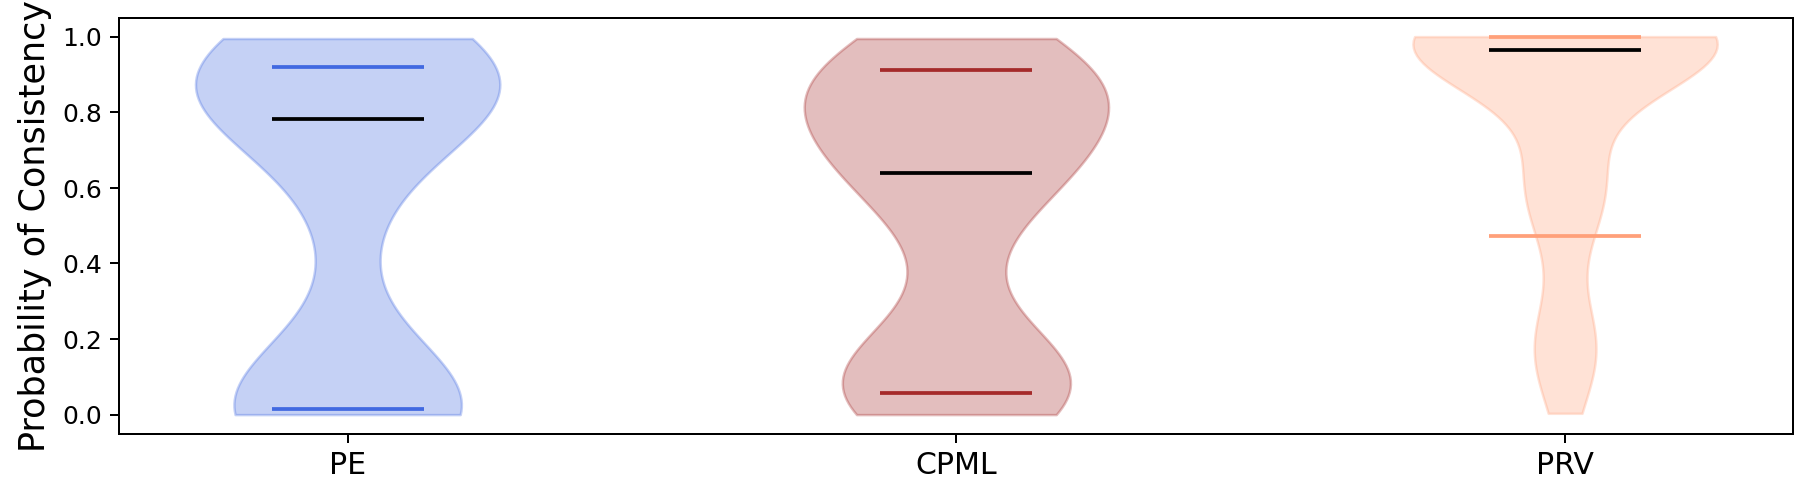

In [7]:
fig, ax=plt.subplots(1,num, dpi=180., facecolor='white', sharey=True, figsize=(12,3))
fig.subplots_adjust(wspace=0)
box = makeboxes(num, probPE, probCPML, probPRV)
labels,vplots = ['PE', 'CPML', 'PRV'],[]

for i in range(num): 
    vplots.append(ax.violinplot(box[0], showmedians=True, showextrema=False, quantiles=[[.16,.84], [.16,.84], [.16,.84]]))

for box in vplots:
    for patch, color in zip(box['bodies'], colors): patch.set_color(color)
    box['cmedians'].set_edgecolor('k')
    box['cquantiles'].set_edgecolor(sum([[c,c] for c in colors],[]))

ax.set_xticks([1,2,3])
ax.set_xticklabels(labels, fontsize=12)
ax.set_ylabel('Probability of Consistency', fontsize=14)
plt.savefig('../figures/Figure 6.png', dpi=180., bbox_inches='tight')

## Plot Figure 7

In [8]:
num,bounds = 4,(0.138, 0.6, 0.8, 1.0, 1.3)
bins=makebins(num, bounds)
probPE,probCPML,probPRV = prob_lists(bins)

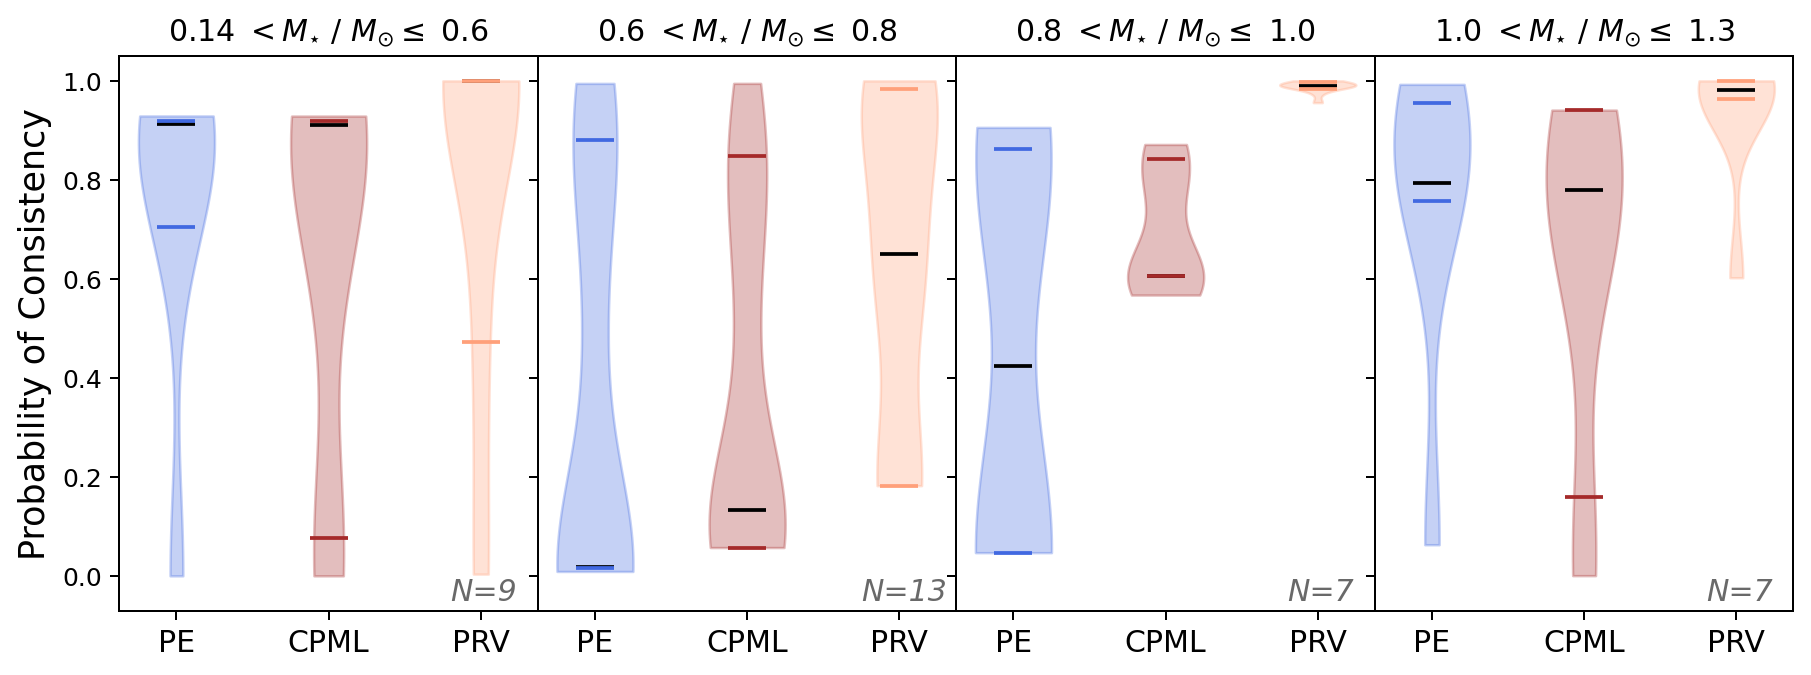

In [9]:
fig, ax=plt.subplots(1,num, dpi=180., facecolor='white', sharey=True, figsize=(12,4))
fig.subplots_adjust(wspace=0)
ax[0].set_ylabel('Probability of Consistency', fontsize=14)

box = makeboxes(num, probPE, probCPML, probPRV)
labels,vplots,titles,text = ['PE', 'CPML', 'PRV'],[], [r'0.14 $ < M_{\star}$ / $M_{\odot} \leq $ 0.6', r'0.6 $ < M_{\star}$ / $M_{\odot} \leq $ 0.8', \
                            r'0.8 $ < M_{\star}$ / $M_{\odot} \leq $ 1.0', r'1.0 $ < M_{\star}$ / $M_{\odot} \leq $ 1.3'], \
                            [{'x':2.8,'text':'N=9'},{'x':2.75,'text':'N=13'},{'x':2.8,'text':'N=7'},{'x':2.8,'text':'N=7'}]

for i in range(num): 
    vplots.append(ax[i].violinplot(box[i], showmedians=True, showextrema=False, quantiles=[[.16,.84], [.16,.84], [.16,.84]]))
    ax[i].set_xticks([1,2,3])
    ax[i].set_xticklabels(labels, fontsize=12)
    ax[i].set_title(titles[i])
    ax[i].set_ylim(-0.07, 1.05)
    ax[i].text(text[i]['x'], -0.05, text[i]['text'], fontsize=12, fontstyle='italic', color='dimgray')

for box in vplots:
    for patch, color in zip(box['bodies'], colors): patch.set_color(color)
    box['cmedians'].set_edgecolor('k')
    box['cquantiles'].set_edgecolor(sum([[c,c] for c in colors],[]))

plt.savefig('../figures/Figure 7.png', dpi=180., bbox_inches='tight')